In [1]:
%load_ext autoreload
%autoreload 2
from astropy.io import fits

In [2]:
path_bar = './mask_STIS_coron.fits'

In [3]:
import visitSTIScoron

In [4]:
data = fits.getdata(path_bar)

# 1. Create visibility map

## 1.1 Simple occulting locations

In [5]:
mask_wedgea06 = visitSTIScoron.occultedMask(data, 'WEDGEA0.6')
mask_bar5 = visitSTIScoron.occultedMask(data, 'BAR5')
#all supported locations: ['BAR5', 'BAR10', 
#                     'WEDGEA0.6', 'WEDGEA1.0', 'WEDGEA1.8', 'WEDGEA2.0', 'WEDGEA2.5', 'WEDGEA2.8', 
#                     'WEDGEB1.0', 'WEDGEB1.8', 'WEDGEB2.0', 'WEDGEB2.5', 'WEDGEB2.8']

## 1.2. Multiple telescope rolls

### 1.2.1 BAR5 ± 30 deg

In [6]:
mask_bar5_0deg = visitSTIScoron.rotateMask(mask_bar5, 0)
mask_bar5_p30deg = visitSTIScoron.rotateMask(mask_bar5, 30)
mask_bar5_m30deg = visitSTIScoron.rotateMask(mask_bar5, -30)

map_bar5_pm30 = mask_bar5_0deg + mask_bar5_p30deg + mask_bar5_m30deg

### 1.2.2 {BAR5, WedgeA0.6} ± 30 deg

In [7]:
mask_wedgea06_0deg = visitSTIScoron.rotateMask(mask_wedgea06, 0)
mask_wedgea06_p30deg = visitSTIScoron.rotateMask(mask_wedgea06, 30)
mask_wedgea06_m30deg = visitSTIScoron.rotateMask(mask_wedgea06, -30)
total_bar5_wedgea06pm30 = mask_bar5_p30deg+mask_bar5_m30deg+mask_bar5_0deg+mask_wedgea06_p30deg+mask_wedgea06_m30deg+mask_wedgea06_0deg

# 2. Display visibility for scenarios created above

## 2.1 Simple cases

### 2.1.1 Simple Case: BAR5 only

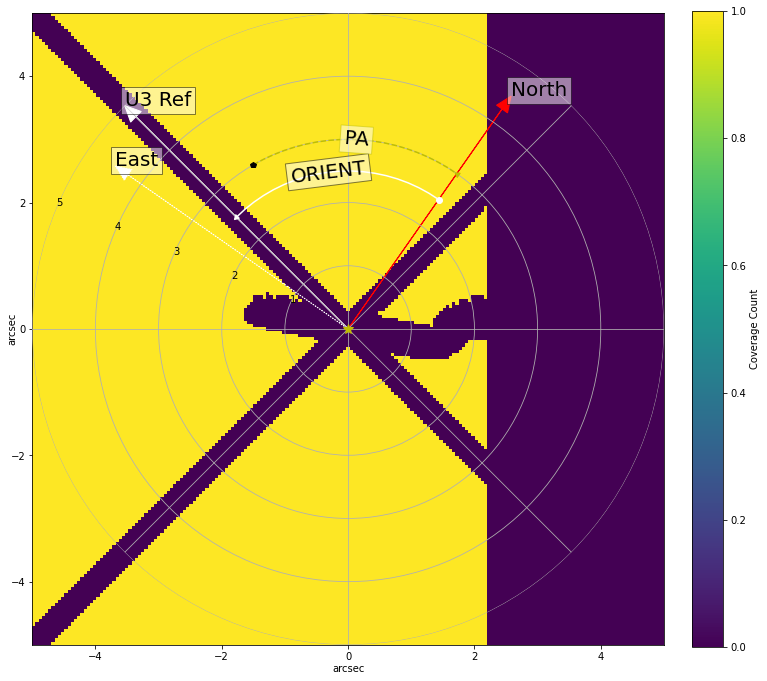

In [8]:
visitSTIScoron.drawCoverageAndFeature(mask_bar5, fov = 10, orient = 80, pa_feature_start=65, seperation_feature_start= 3,
                                     save_address='./VIST-STIS-BAR5.pdf')

### 2.1.1 Simple Case: WedgeA0.6 only

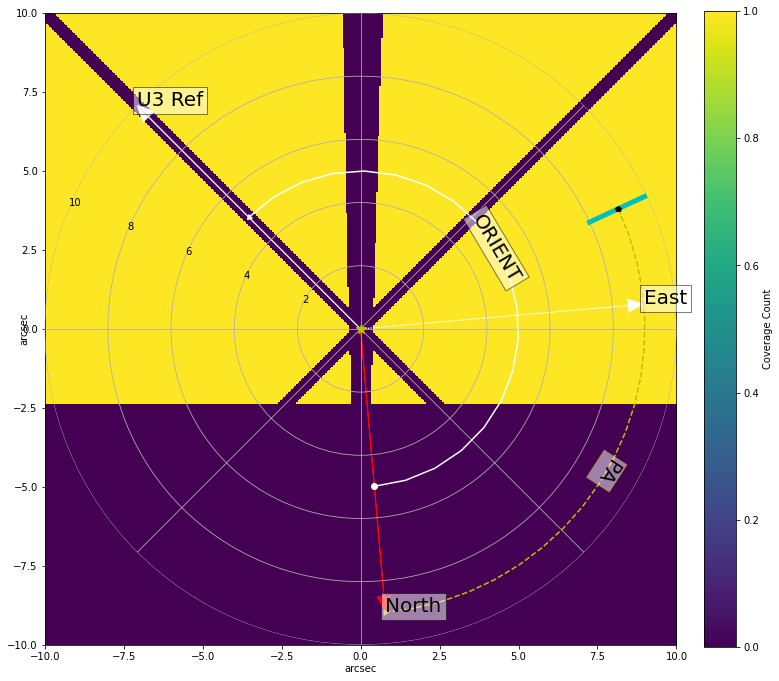

In [9]:
visitSTIScoron.drawCoverageAndFeature(mask_wedgea06, fov = 20, orient = 220, pa_feature_start=110, 
                                      seperation_feature_start= 8, seperation_feature_end= 10,
                                     save_address='./VIST-STIS-WedgeA06.pdf')

## 2.2 Cases with telescope roll, then multiple occulting locations

### 2.2.1 Multiple telescope roll: BAR5 ± 30 deg

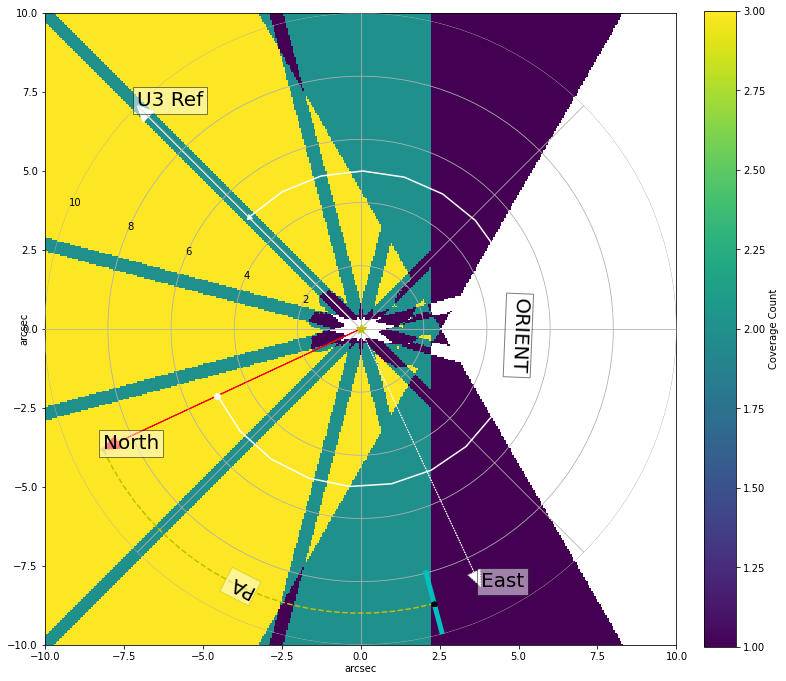

In [10]:
visitSTIScoron.drawCoverageAndFeature(map_bar5_pm30, fov = 20, orient = 290, pa_feature_start=80, 
                                      seperation_feature_start= 8, seperation_feature_end= 10, white_for_zero_coverage = True,
                                     save_address='./VIST-STIS-BAR5pm30.pdf')

### 2.2.2 Multiple roll and Multiple Occulting locations: {BAR5 + WedgeA0.6} ± 30 deg

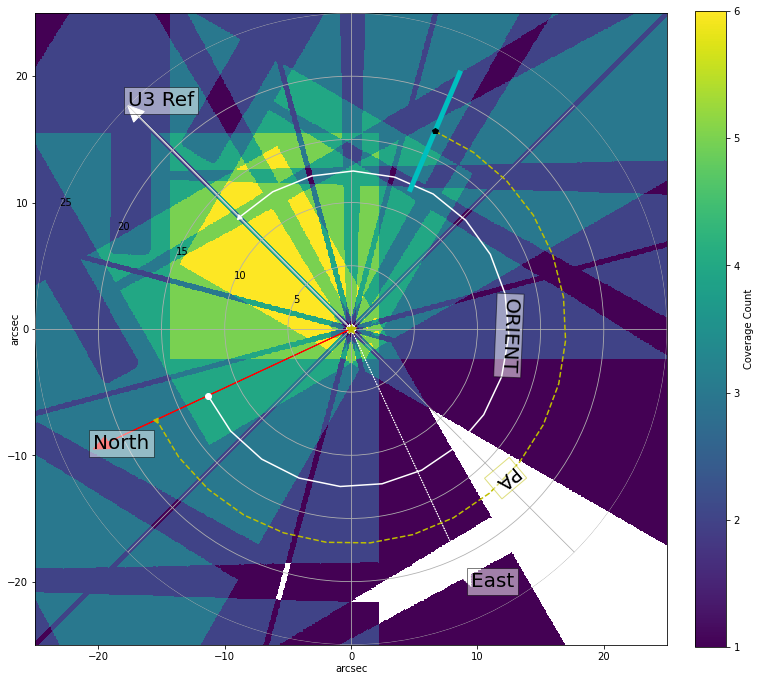

In [11]:
visitSTIScoron.drawCoverageAndFeature(total_bar5_wedgea06pm30, fov = 50, orient = 290, pa_feature_start=222, 
                                      seperation_feature_start= 12, seperation_feature_end= 22, white_for_zero_coverage = True,
                                     save_address='./VIST-STIS-BAR5WedgeA06pm30.pdf')